# Initial Set-Up

In [10]:
# Initial set-up

from problema_backtracking import problema
from aproximacion import aproximar

# Importing libraries
import numpy as np
from matplotlib import pyplot as plt
from utils.utils import time_algorithm
import seaborn as sns
import scipy as sp
import time

# Setting up the style of the plots
sns.set_theme()

# Backtracking

In [53]:
# Exectute the algorithm with random arrays and measure the time it takes to run
def get_random_array(size):
    from random import randint
    row_demand = []
    col_demand = []
    ships = []

    n = size
    m = size

    for _ in range(size):
        row_demand.append(randint(0, size - 1))
        col_demand.append(randint(0, size - 1))
        
    b = int(size/3) if int(size/3) > 0 else 1
    for _ in range(b):
        ships.append(4)

    board = [[0] * m for _ in range(n)]
    mejor_solucion = [board, float("inf")]
    barcos = [(i + 1, length) for i, length in enumerate(ships)]

    return board, barcos, row_demand, col_demand, mejor_solucion

sizes = [x for x in range(5, 31)]
runs_per_size = 50
results = {}
        
for size in sizes:
    times_per_size = []
    for _ in range(runs_per_size):
        board, barcos, row_demand, col_demand, mejor_solucion = get_random_array(size)
        init_time = time.time()
        problema(
            board,
            barcos,
            row_demand,
            col_demand,
            mejor_solucion,
        )
        end_time = time.time()

        time_for_run = end_time - init_time
        times_per_size.append(time_for_run)

    average_time = np.mean(times_per_size)
    results[size] = average_time

    print("For size", size, "average time is", average_time)

x = sizes

For size 5 average time is 7.48443603515625e-05
For size 6 average time is 0.0008786582946777344
For size 7 average time is 0.0009698152542114257
For size 8 average time is 0.0014684724807739258
For size 9 average time is 0.0044226694107055665
For size 10 average time is 0.005521354675292969
For size 11 average time is 0.008626804351806641
For size 12 average time is 0.10832010746002198
For size 13 average time is 0.02561318874359131
For size 14 average time is 0.035585517883300784
For size 15 average time is 0.06415138721466064
For size 16 average time is 0.06137314796447754
For size 17 average time is 0.07489237308502197
For size 18 average time is 0.12067973136901855
For size 19 average time is 0.16210809707641602
For size 20 average time is 0.18085127353668212
For size 21 average time is 0.2510820198059082
For size 22 average time is 0.3141224098205566
For size 23 average time is 0.3419692230224609
For size 24 average time is 0.4544920206069946
For size 25 average time is 0.5013695

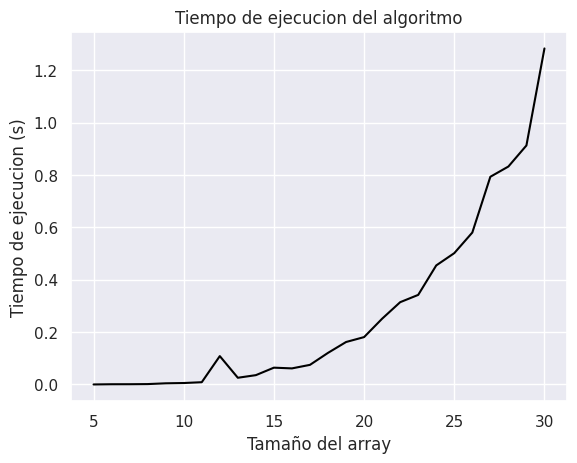

In [54]:
# Plot the results of the executions
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.set_title("Tiempo de ejecucion del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
plt.show()

In [55]:
# Aproximate the function with a lineal, exponential, and n^2 functions

# Define the functions
f_lineal = lambda x, c1, c2: c1 * x + c2
f_exponencial = lambda x, c1, c2: c1 * np.exp(c2 * x)
f_n2 = lambda x, c1, c2: c1 * x**2 + c2

# Fit the functions
c_lineal, _ = sp.optimize.curve_fit(f_lineal, x, [results[n] for n in x])
c_exponencial, _ = sp.optimize.curve_fit(f_exponencial, x, [results[n] for n in x])
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

# Print the results
print(f"c_1 lineal: {c_lineal[0]}, c_2 lineal: {c_lineal[1]}")
print(f"c_1 exponencial: {c_exponencial[0]}, c_2 exponencial: {c_exponencial[1]}")
print(f"c_1 n^2: {c_n2[0]}, c_2 n^2: {c_n2[1]}")

c_1 lineal: 0.039709684033370427, c_2 lineal: -0.4211185952241896
c_1 exponencial: 0.004933519228112523, c_2 exponencial: 0.18403265271486882
c_1 n^2: 0.0012026291192920313, c_2 n^2: -0.16215218149554134


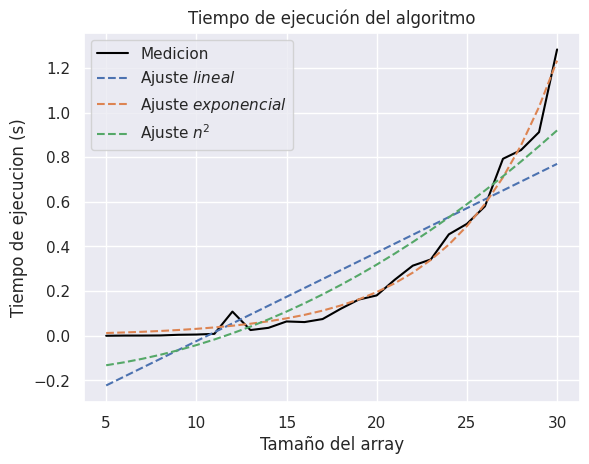

In [56]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.plot(x, [f_lineal(n, c_lineal[0], c_lineal[1]) for n in x], "--", label="Ajuste $lineal$")
ax.plot(
    x, [f_exponencial(n, c_exponencial[0], c_exponencial[1]) for n in x], "--", label="Ajuste $exponencial$"
)
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], "--", label="Ajuste $n^2$")
ax.set_title("Tiempo de ejecución del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
ax.legend()
plt.show()

In [58]:
# Cuadratic errors

errors_lineal = [np.abs(f_lineal(n, c_lineal[0], c_lineal[1]) - results[n]) for n in x]
errors_exponencial = [
    np.abs(f_exponencial(n, c_exponencial[0], c_exponencial[1]) - results[n])
    for n in x
]
errors_n2 = [np.abs(f_n2(n, c_n2[0], c_n2[1]) - results[n]) for n in x]

# Imprimir los errores cuadráticos totales
print(f"Error cuadrático total ajuste lineal: {np.sum(np.power(errors_lineal, 2))}")
print(f"Error cuadrático total ajuste n^2: {np.sum(np.power(errors_n2, 2))}")
print(
    f"Error cuadrático total ajuste exponencial: {np.sum(np.power(errors_exponencial, 2))}"
)

Error cuadrático total ajuste lineal: 0.7177906240791341
Error cuadrático total ajuste n^2: 0.33801731176045435
Error cuadrático total ajuste exponencial: 0.03798563877166582


# Aproximacion

In [48]:
# Exectute the algorithm with random arrays and measure the time it takes to run
def get_random_array_for_aproximation(size): 
    from random import randint   
    row_demand = []
    col_demand = []
    ships = []

    n = size
    m = size

    for _ in range(size):
        row_demand.append(randint(0, size - 1))
        col_demand.append(randint(0, size - 1))
        
    b = int(size/3) if int(size/3) > 0 else 1
    for _ in range(b):
        ships.append(4)

    board = [[0] * m for _ in range(n)]
    barcos = [(i + 1, length) for i, length in enumerate(ships)]

    return board, barcos, row_demand, col_demand

sizes = [x for x in range(5, 201)]
runs_per_size = 1000
results = {}
        
for size in sizes:
    times_per_size = []
    for _ in range(runs_per_size):
        board, barcos, row_demand, col_demand = get_random_array_for_aproximation(size)
        init_time = time.time()
        aproximar(
            row_demand,
            col_demand,
            barcos,
            board
        )
        end_time = time.time()

        time_for_run = end_time - init_time
        times_per_size.append(time_for_run)

    average_time = np.mean(times_per_size)
    results[size] = average_time

    print("For size", size, "average time is", average_time)

x = sizes

For size 5 average time is 3.544187545776367e-05
For size 6 average time is 1.9220590591430665e-05
For size 7 average time is 2.2839069366455077e-05
For size 8 average time is 2.9851675033569334e-05
For size 9 average time is 7.624125480651855e-05
For size 10 average time is 5.365300178527832e-05
For size 11 average time is 4.85072135925293e-05
For size 12 average time is 7.008838653564453e-05
For size 13 average time is 6.841158866882325e-05
For size 14 average time is 6.986451148986817e-05
For size 15 average time is 0.00011040139198303223
For size 16 average time is 9.593772888183594e-05
For size 17 average time is 9.178495407104492e-05
For size 18 average time is 0.00010882139205932617
For size 19 average time is 0.00011876916885375976
For size 20 average time is 0.0001174919605255127
For size 21 average time is 0.00012804007530212402
For size 22 average time is 0.0003193364143371582
For size 23 average time is 0.0002581992149353027
For size 24 average time is 0.0002160685062408447

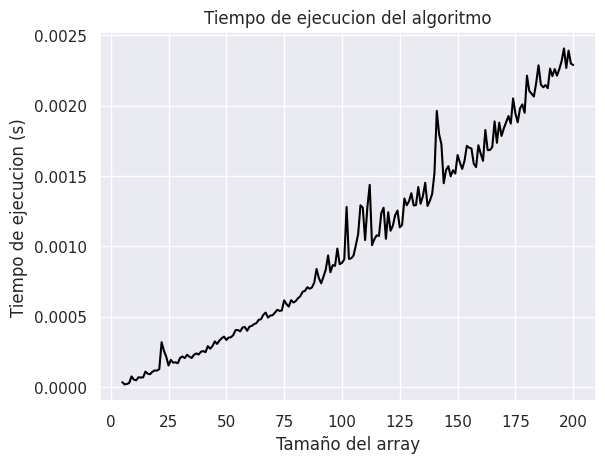

In [49]:
# Plot the results of the executions
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.set_title("Tiempo de ejecucion del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
plt.show()

In [50]:
# Aproximate the function with a lineal, n log(n) and n^2 functions

# Define the functions
f_lineal = lambda x, c1, c2: c1 * x + c2
f_exponencial = lambda x, c1, c2: c1 * np.exp(c2 * x)
f_n2 = lambda x, c1, c2: c1 * x**2 + c2

# Fit the functions
c_lineal, _ = sp.optimize.curve_fit(f_lineal, x, [results[n] for n in x])
c_nlogn, _ = sp.optimize.curve_fit(f_nlogn, x, [results[n] for n in x])
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

# Print the results
print(f"c_1 lineal: {c_lineal[0]}, c_2 lineal: {c_lineal[1]}")
print(f"c_1 n log(n): {c_nlogn[0]}, c_2 n log(n): {c_nlogn[1]}")
print(f"c_1 n^2: {c_n2[0]}, c_2 n^2: {c_n2[1]}")

c_1 lineal: 1.2236885886315198e-05, c_2 lineal: -0.0002256845612587178
c_1 n log(n): 2.22797977267827e-06, c_2 n log(n): -6.819093359964419e-05
c_1 n^2: 5.7722997244141957e-08, c_2 n^2: 0.00023735825971800056


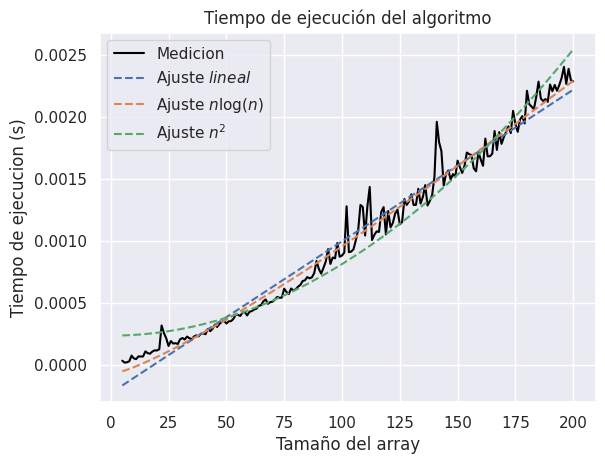

In [51]:
# Plot the results with the adjusted curves

fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.plot(x, [f_lineal(n, c_lineal[0], c_lineal[1]) for n in x], "--", label="Ajuste $lineal$")
ax.plot(
    x, [f_nlogn(n, c_nlogn[0], c_nlogn[1]) for n in x], "--", label="Ajuste $n \log(n)$"
)
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], "--", label="Ajuste $n^2$")
ax.set_title("Tiempo de ejecución del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
ax.legend()
plt.show()

In [52]:
# Cuadratic errors

errors_lineal = [np.abs(f_lineal(n, c_lineal[0], c_lineal[1]) - results[n]) for n in x]
errors_nlogn = [np.abs(f_nlogn(n, c_nlogn[0], c_nlogn[1]) - results[n]) for n in x]
errors_n2 = [np.abs(f_n2(n, c_n2[0], c_n2[1]) - results[n]) for n in x]

print(f"Error cuadrático total ajuste lineal: {np.sum(np.power(errors_lineal, 2))}")
print(f"Error cuadrático total ajuste n log(n): {np.sum(np.power(errors_nlogn, 2))}")
print(f"Error cuadrático total ajuste n^2: {np.sum(np.power(errors_n2, 2))}")

Error cuadrático total ajuste lineal: 2.531778573111706e-06
Error cuadrático total ajuste n log(n): 1.6924690208497464e-06
Error cuadrático total ajuste n^2: 3.2746531742500665e-06
